In [1]:
import vice
import arya
import matplotlib.pyplot as plt
import pandas as pd
from surp import ViceModel
import numpy as np

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [91]:
walks_raw = pd.read_csv("../../models/fiducial/run/star_migration.dat") # requires a bit of memory

In [92]:
t_end = np.max(walks_raw.time)

In [93]:
t_end

np.float64(13.18)

In [94]:
walks_raw

,zone,time_int,n,time,R,z,bin_id
0,0,0,0,0.00,0.023498,0.000000,0
1,0,0,0,0.02,0.020256,0.011064,0
2,0,0,0,0.04,0.018913,0.015647,0
3,0,0,0,0.06,0.017883,0.019164,0
4,0,0,0,0.08,0.017014,0.022129,0
...,...,...,...,...,...,...,...
43625995,195,659,0,13.18,19.571898,0.000000,195
43625996,196,659,0,13.18,19.637364,0.000000,196
43625997,197,659,0,13.18,19.709436,0.000000,197
43625998,198,659,0,13.18,19.802055,0.000000,198


In [96]:
walks = walks_raw.set_index(["zone", "time_int"]) # multiindex makes this much easier...
walks.sort_index(inplace=True)

In [97]:
df_end = walks[walks.time == t_end]

In [98]:
df_end

n   time          R         z  bin_id
zone time_int                                       
0    0         0  13.18   0.059718  0.284035       0
     1         0  13.18   0.200881 -0.287960       2
     2         0  13.18   0.013432 -0.533872       0
     3         0  13.18   0.021965 -0.624993       0
     4         0  13.18   0.018697 -0.274151       0
...           ..    ...        ...       ...     ...
199  655       0  13.18  19.773394  0.171774     197
     656       0  13.18  18.814481  0.460793     188
     657       0  13.18  19.914270 -0.486292     199
     658       0  13.18  19.964212  0.877525     199
     659       0  13.18  19.977848  0.000000     199

[132000 rows x 5 columns]

In [100]:
Ns = df_end.index.values # last slice contains every value

In [101]:
t_int_end = np.max(walks_raw.time_int)

In [102]:
walks.loc[(1, 32)]

n   time         R         z  bin_id
zone time_int                                      
1    32        0   0.64  0.123599  0.000000       1
     32        0   0.66  0.134323 -0.005098       1
     32        0   0.68  0.138765 -0.007210       1
     32        0   0.70  0.142173 -0.008831       1
     32        0   0.72  0.145047 -0.010197       1
...           ..    ...       ...       ...     ...
     32        0  13.10  0.391264 -0.127255       3
     32        0  13.12  0.391478 -0.127357       3
     32        0  13.14  0.391693 -0.127459       3
     32        0  13.16  0.391907 -0.127561       3
     32        0  13.18  0.392121 -0.127663       3

[628 rows x 5 columns]

In [105]:
Np = len(Ns)
t_birth = np.empty(Np)
Ri = np.zeros(Np)
Rf = np.zeros(Np)
zf = np.zeros(Np)


for n, idx in enumerate(Ns):
    print(f"{n} / {Np}", end="\r")
    ws = walks.loc[idx[0], idx[1]]
    t_birth[n] = ws.time.iloc[0]
    assert ws.time.iloc[-1] == t_end
    Ri[n] = ws.R.iloc[0]
    Rf[n] = ws.R.iloc[-1]
    zf[n] = ws.z.iloc[-1]
    
dR = Rf - Ri

np.float64(1.34)

In [150]:
σ8 = 2.68

Text(0, 0.5, 'density')

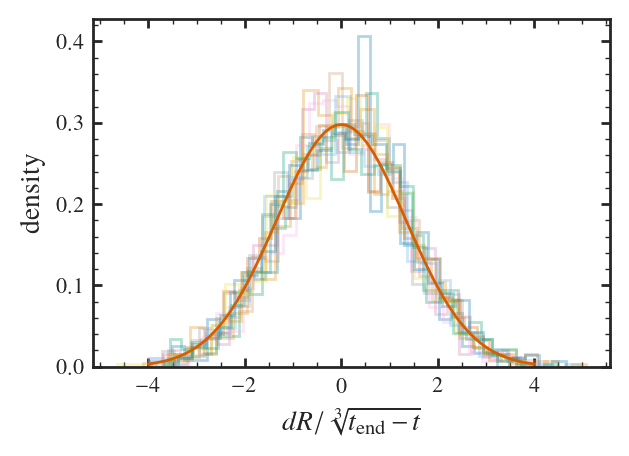

In [152]:
for t in np.arange(0, 13.0):
    dt = 0.5
    filt = t_birth > t - dt
    filt &= t_birth < t + dt
    filt &= Ri > 7
    filt &= Ri < 9
    plt.hist(dR[filt]/np.cbrt(13.2 - t_birth[filt]), 30, histtype="step", density=True, alpha=0.3)
    
x = np.linspace(-4, 4, 1000)
σ = σ8 / np.cbrt(8)
y = 1/np.sqrt(2*np.pi) * 1/σ * np.exp(-x**2 / (2*σ**2))
plt.plot(x, y)
plt.xlabel(r"$dR / \sqrt[3]{t_{\rm  end} - t}$")
plt.ylabel("density")

In [108]:
dz = np.abs(zf)

(-2.0, 2.0)

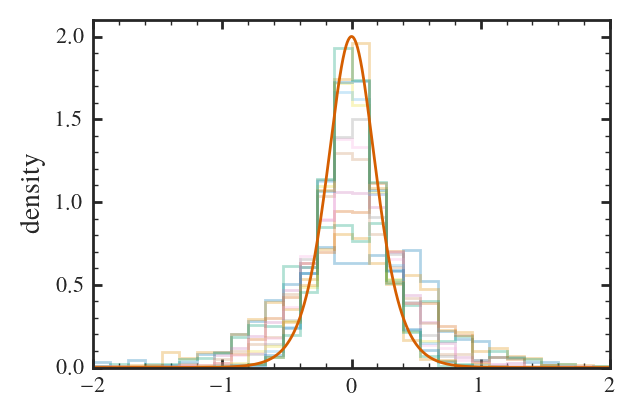

In [156]:
for t in np.arange(0, 13.0):
    dt = 0.5
    filt = t_birth > t - dt
    filt &= t_birth < t + dt
    filt &= Rf > 7
    filt &= Rf < 9
    delta_t = 13.2 - t
    plt.hist(zf[filt] /delta_t**0.33, 30, range=(-2, 2), histtype="step", density=True, alpha=0.3)

x_m = np.linspace(-2, 2, 1000)
hz = 0.5
plt.plot(x_m, 1 /hz / np.cosh(x/hz)**2)
plt.ylabel("density")
plt.xlim(-2, 2)

all time bins appear to be well approximated by the gaussian (yay). The overabundance at 0 is likely due to boundry conditions (r=0 and r=20).

Text(0, 0.5, 'dr')

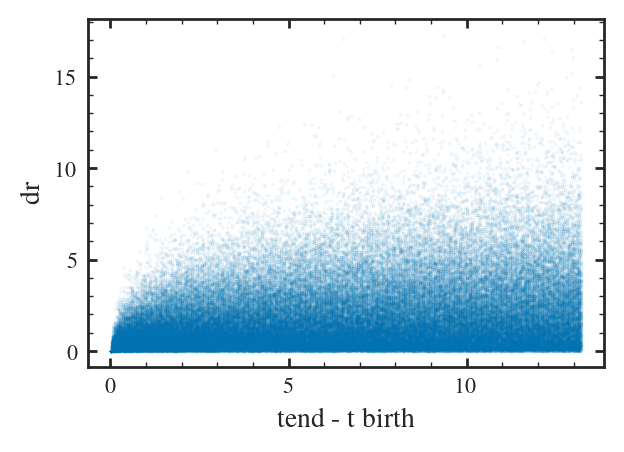

In [118]:
plt.scatter(13.2 - t_birth, np.abs(dR), s=0.05, alpha=0.1)
plt.xlabel("tend - t birth")
plt.ylabel('dr')

In [119]:
z0 = 2
dz = 0.1
filt = Ri > z0 - dz
filt &= Ri <= z0 + dz

In [120]:
idx = Ns[filt]

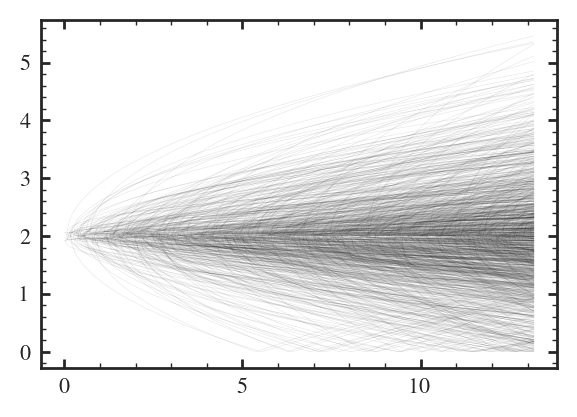

In [122]:
for N in idx:
    w = walks.loc[N[0], N[1]]
    plt.plot(w.time, w.R, lw=0.2, alpha=0.1, color="k")
    


Text(0, 0.5, 'z / kpc')

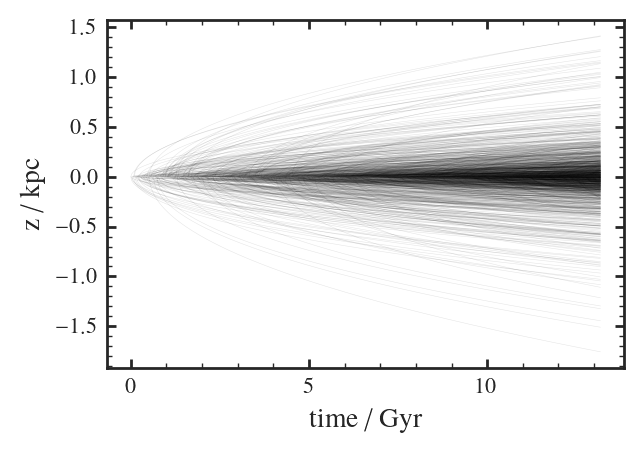

In [123]:
for N in idx:
    w = walks.loc[N[0], N[1]]
    plt.plot(w.time, w.z, lw=0.2, alpha=0.1, color="k")

plt.xlabel("time / Gyr")
plt.ylabel("z / kpc")
